In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

path_to_train_csv = "./IA2-train.csv"
path_to_dev_csv = "./IA2-dev.csv"

originalData = pd.read_csv(path_to_train_csv)
testData = pd.read_csv(path_to_dev_csv)

In [74]:
originalData.head()

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,24,1,0,1,2630,187,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,44,1,0,1,56865,150,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,32,1,0,1,50126,188,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,56,1,0,1,45578,89,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,32,1,0,1,2630,227,0,0,...,0,0,0,0,0,0,0,0,0,1


## Data prepping

In [75]:
normalizeData = originalData.copy()
normalizeData['Age'] = (originalData['Age'] - originalData['Age'].mean()) / originalData['Age'].std()
normalizeData['Annual_Premium'] = (originalData['Annual_Premium'] - originalData['Annual_Premium'].mean()) / originalData['Annual_Premium'].std()
normalizeData['Vintage'] = (originalData['Vintage'] - originalData['Vintage'].mean()) / originalData['Vintage'].std()

normalizeData.head()

,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,1,-1.171848,1,0,1,-1.605168,0.382089,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0.242588,1,0,1,1.488182,-0.060277,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,-0.606074,1,0,1,1.103816,0.394044,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,1.091249,1,0,1,0.844416,-0.789583,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,-0.606074,1,0,1,-1.605168,0.860322,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
validationData = testData
validationData['Age'] = (validationData['Age'] - originalData['Age'].mean()) / originalData['Age'].std()
validationData['Annual_Premium'] = (validationData['Annual_Premium'] - originalData['Annual_Premium'].mean()) / originalData['Annual_Premium'].std()
validationData['Vintage'] = (validationData['Vintage'] - originalData['Vintage'].mean()) / originalData['Vintage'].std()

validationData.head()


,dummy,Gender,Age,Driving_License,Previously_Insured,Vehicle_Damage,Annual_Premium,Vintage,Region_Code_0,Region_Code_1,...,Policy_Sales_Channel_153,Policy_Sales_Channel_154,Policy_Sales_Channel_155,Policy_Sales_Channel_156,Policy_Sales_Channel_157,Policy_Sales_Channel_158,Policy_Sales_Channel_159,Policy_Sales_Channel_160,Policy_Sales_Channel_163,Response
0,1,0,-1.242570,1,1,0,-0.259802,1.230953,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,-0.040300,1,0,1,0.288714,1.338555,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,1,-0.747518,1,0,1,0.226259,0.406000,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,-1.101127,1,1,0,-1.605168,0.274486,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,-0.111021,1,0,1,1.489208,-1.638447,0,0,...,0,0,0,0,0,0,0,0,0,1


## Part 1

In [77]:
MAX_ITER = 5000
#MAX_ITER = 10000

#MIN_ERR = 0.05
MIN_ERR = 0.01
#MIN_ERR = 0.005

initialGuess = np.repeat(0.0, len(testData.columns) - 1)
## W0 = [1,1, ..., 1]

featureData = normalizeData.drop(['Response'], axis = 1)
featureValidationData = validationData.drop(['Response'], axis = 1)
## Get new dataset with only feature

featuresNumber = featureData.columns.size
def sigmoid(x):
    return 1/(1+np.exp(-x))
## define sigmoid function

def BGDLogic(inputData, resultData, initVector, maxIter, minErr, alphaRate, lambdaReg):
    iteration = 0
    dataSize = len(inputData)
    w = initVector.copy()
    gradientVector = ((alphaRate/dataSize)*((inputData.mul(resultData - sigmoid(inputData.mul(w).sum(axis = 1)), axis = 0)).sum(axis = 0))).values
    normGradient = np.linalg.norm(gradientVector)
    while (normGradient > minErr and not np.isinf(normGradient) and iteration < maxIter):
        w = w + gradientVector
        for index, w_j in enumerate(w):
            if (index >= 1):
                w_j = w_j - alphaRate*lambdaReg*w_j
            w[index] = w_j
        gradientVector = ((alphaRate/dataSize)*((inputData.mul(resultData - sigmoid(inputData.mul(w).sum(axis = 1)), axis = 0)).sum(axis = 0))).values
        normGradient = np.linalg.norm(gradientVector)
        iteration += 1
        print('Gradient: %9.7f, Iteration: [%d/%d]\r'%(normGradient,iteration,MAX_ITER), end="")
    return w
## Batch gradient descent L2

def getPrediction(W, features):
    predictionsArray = sigmoid(features.mul(W).sum(axis = 1))
    return list(map(lambda x: 1 if x >= 0.5 else 0, predictionsArray))

def getAccuracy(predictions, actual):
    return 1 - (np.count_nonzero(list(predictions - actual))/actual.size)

def roundingW(W):
    return list(map(lambda x: 0 if x < 1e-9 else x, W))
## Helper functions



In [78]:
wLambda0001 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.001)

trainAccWLambda0001 = getAccuracy(getPrediction(wLambda0001, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda0001)

valAccWLambda0001 = getAccuracy(getPrediction(wLambda0001, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda0001)


Gradient: 0.0099589, Iteration: [66/5000]
 Training accuracy: 0.7727

 Validating accuracy: 0.7730 


In [79]:
wLambda001 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.01)

trainAccWLambda001 = getAccuracy(getPrediction(wLambda001, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda001)

valAccWLambda001 = getAccuracy(getPrediction(wLambda001, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda001)


Gradient: 0.0099519, Iteration: [69/5000]
 Training accuracy: 0.7730

 Validating accuracy: 0.7737


In [80]:
wLambda01 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.1)

trainAccWLambda01 = getAccuracy(getPrediction(wLambda01, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda01)

valAccWLambda01 = getAccuracy(getPrediction(wLambda01, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda01)

Gradient: 0.0101192, Iteration: [5000/5000]
 Training accuracy: 0.7818

 Validating accuracy: 0.7829


In [81]:
wLambda1 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 1)

trainAccWLambda1 = getAccuracy(getPrediction(wLambda1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda1)

valAccWLambda1 = getAccuracy(getPrediction(wLambda1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda1)

Gradient: 0.0210566, Iteration: [5000/5000]
 Training accuracy: 0.7458

 Validating accuracy: 0.7467


In [82]:
wLambda10 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 10)

trainAccWLambda10 = getAccuracy(getPrediction(wLambda10, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda10)

valAccWLambda10 = getAccuracy(getPrediction(wLambda10, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda10)

Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066


In [83]:
wLambda100 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 100)

trainAccWLambda100 = getAccuracy(getPrediction(wLambda100, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda100)

valAccWLambda100 = getAccuracy(getPrediction(wLambda100, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda100)

/home/kingston/.local/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


/home/kingston/.local/lib/python3.6/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/kingston/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars
/home/kingston/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in double_scalars


Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066


In [84]:
wLambda1000 = BGDLogic(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 1000)

trainAccWLambda1000 = getAccuracy(getPrediction(wLambda1000, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda1000)

valAccWLambda1000 = getAccuracy(getPrediction(wLambda1000, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f'%valAccWLambda1000)

Gradient: 0.0097135, Iteration: [156/5000]
 Training accuracy: 0.5557

 Validating accuracy: 0.5575


/home/kingston/.local/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in double_scalars


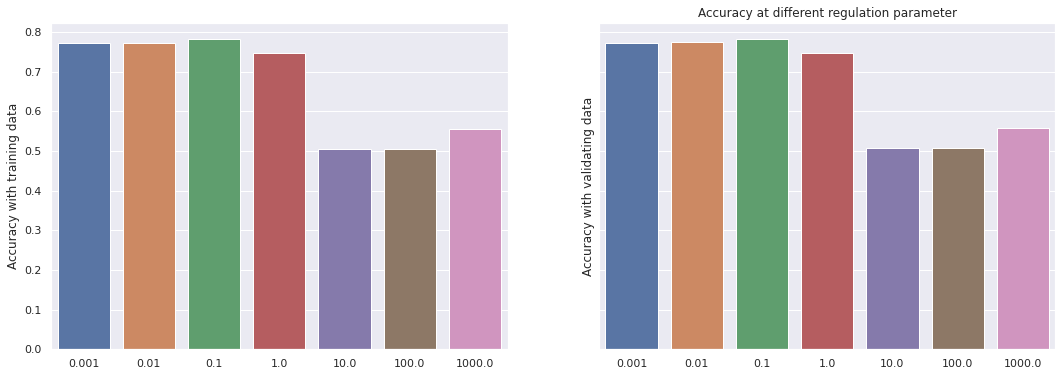

In [85]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
plt.title("Accuracy at different regulation parameter")

x1 = np.array([0.001,0.01,0.1,1,10,100,1000])
y1 = np.array([trainAccWLambda0001, trainAccWLambda001, trainAccWLambda01, trainAccWLambda1, trainAccWLambda10, trainAccWLambda100, trainAccWLambda1000])
sns.barplot(x=x1, y=y1, ax=ax1)
ax1.set_ylabel("Accuracy with training data")

x2 = np.array([0.001,0.01,0.1,1,10,100,1000])
y2 = np.array([valAccWLambda0001, valAccWLambda001, valAccWLambda01, valAccWLambda1, valAccWLambda10, valAccWLambda100, valAccWLambda1000])
sns.barplot(x=x2, y=y2, ax=ax2)
ax2.set_ylabel("Accuracy with validating data")
plt.show()

Most important weight:

In [86]:
FinalWStar = dict(zip(featureData.columns.values, wLambda01))
dict(sorted(FinalWStar.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'Vehicle_Damage': 0.6537779621047667,
 'Previously_Insured': -0.6089916424840339,
 'dummy': -0.4522926721583861,
 'Policy_Sales_Channel_152': -0.24656414183661512,
 'Vehicle_Age_1': -0.2202490499985398,
 'Vehicle_Age_0': 0.14083011814139804,
 'Policy_Sales_Channel_26': 0.1335342581047627,
 'Policy_Sales_Channel_124': 0.12596335208473558,
 'Region_Code_28': 0.12104135537862591,
 'Policy_Sales_Channel_160': -0.08588984638093118,
 'Vehicle_Age_2': 0.07941873603604795,
 'Gender': 0.0465256587679606,
 'Annual_Premium': 0.043755593301032764,
 'Policy_Sales_Channel_157': 0.04272859841036621,
 'Policy_Sales_Channel_156': 0.03369226007155775,
 'Region_Code_50': -0.032356835738739195,
 'Vintage': -0.031727588963078326,
 'Policy_Sales_Channel_154': 0.02694657318790899,
 'Region_Code_8': -0.022429282331223453,
 'Region_Code_3': 0.02145676656531809,
 'Region_Code_15': -0.020886108261093342,
 'Region_Code_46': -0.018256433035521373,
 'Policy_Sales_Channel_163': 0.01721637693817406,
 'Region_Code_48

In [87]:
FinalWDash = dict(zip(featureData.columns.values, wLambda0001))
dict(sorted(FinalWDash.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'Previously_Insured': -0.6096403255489542,
 'Vehicle_Damage': 0.5461315110746,
 'Policy_Sales_Channel_152': -0.2858708806916126,
 'Vehicle_Age_1': -0.2769902256009224,
 'Vehicle_Age_0': 0.10777713617591785,
 'dummy': -0.10728301581319341,
 'Policy_Sales_Channel_26': 0.10473785190677662,
 'Policy_Sales_Channel_124': 0.10362551157805067,
 'Driving_License': -0.10333834455410668,
 'Region_Code_28': 0.10065821070942856,
 'Age': 0.08459425416463882,
 'Policy_Sales_Channel_160': -0.07363750546958375,
 'Vehicle_Age_2': 0.06228569224306372,
 'Annual_Premium': 0.05669508905497592,
 'Vintage': -0.036936496898149575,
 'Policy_Sales_Channel_157': 0.03186994927436401,
 'Region_Code_50': -0.029040097363276025,
 'Region_Code_8': -0.02804399501210817,
 'Policy_Sales_Channel_156': 0.026596992661881886,
 'Region_Code_46': -0.021919731653149168,
 'Policy_Sales_Channel_154': 0.020239230623044453,
 'Region_Code_15': -0.01965072851738138,
 'Region_Code_30': -0.016498847561651434,
 'Policy_Sales_Channel_163

In [88]:
FinalWPlus = dict(zip(featureData.columns.values, wLambda1))
dict(sorted(FinalWPlus.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'Vehicle_Damage': 0.10847828002381119,
 'Previously_Insured': -0.10237412666106924,
 'dummy': -0.09590290900411225,
 'Vehicle_Age_1': -0.05556320790239734,
 'Policy_Sales_Channel_152': -0.05503011826806517,
 'Age': 0.04982208194991651,
 'Vehicle_Age_0': 0.04241722553771404,
 'Region_Code_28': 0.029295305842208467,
 'Policy_Sales_Channel_26': 0.027169298551635697,
 'Policy_Sales_Channel_124': 0.02566130668647596,
 'Annual_Premium': 0.01652486108370886,
 'Gender': 0.013326236527481718,
 'Vehicle_Age_2': 0.013145982364683149,
 'Policy_Sales_Channel_160': -0.012019518170953779,
 'Vintage': -0.008828005977752611,
 'Policy_Sales_Channel_157': 0.00555539903296735,
 'Policy_Sales_Channel_156': 0.005041269984378271,
 'Region_Code_50': -0.0042901785211999464,
 'Policy_Sales_Channel_154': 0.0036889525330539214,
 'Region_Code_30': -0.0030257671529591024,
 'Region_Code_15': -0.0030233631613937727,
 'Region_Code_46': -0.002902306192718063,
 'Region_Code_8': -0.0028848588248727783,
 'Policy_Sales_Ch

Sparcity Report: (assuming near 0 weight is 0 at 1e-9)

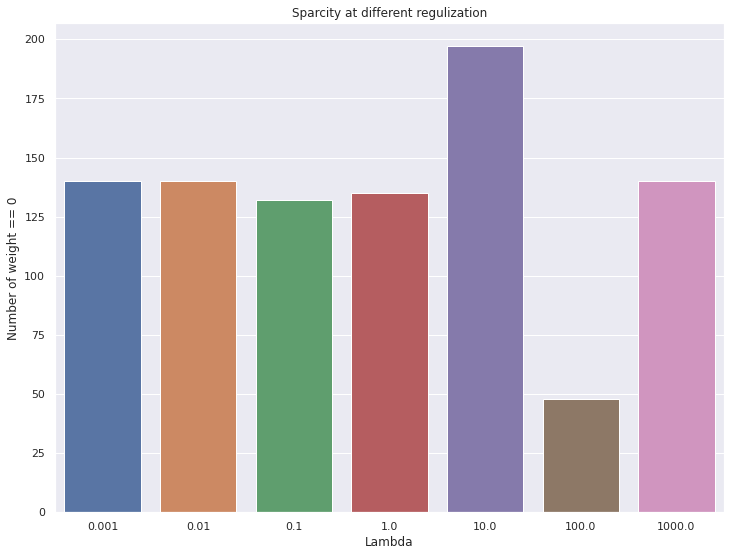

In [89]:
plt.subplots(figsize=(12, 9))
plt.title("Sparcity at different regulization")
xaxis = np.array([0.001,0.01,0.1,1,10,100,1000])
sparcities = np.array([
    featuresNumber - np.count_nonzero(roundingW(wLambda0001)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda001)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda01)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda1)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda10)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda100)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda1000))
])
ax = sns.barplot(x = xaxis, y = sparcities)
ax.set(xlabel='Lambda', ylabel='Number of weight == 0')
plt.show()

## Part 2

In [90]:
def BGDLogicL1(inputData, resultData, initVector, maxIter, minErr, alphaRate, lambdaReg):
    iteration = 0
    dataSize = len(inputData)
    w = initVector.copy()
    gradientVector = ((alphaRate/dataSize)*((inputData.mul(resultData - sigmoid(inputData.mul(w).sum(axis = 1)), axis = 0)).sum(axis = 0))).values
    normGradient = np.linalg.norm(gradientVector)
    while (normGradient > minErr and not np.isinf(normGradient) and iteration < maxIter):
        w = w + gradientVector
        for index, w_j in enumerate(w):
            if (index >= 1):
                if w_j >= 0:
                    w_j = max(np.absolute(w_j) - alphaRate*lambdaReg,0)
                else:
                    w_j = -max(np.absolute(w_j) - alphaRate*lambdaReg,0)
            w[index] = w_j
        gradientVector = ((alphaRate/dataSize)*((inputData.mul(resultData - sigmoid(inputData.mul(w).sum(axis = 1)), axis = 0)).sum(axis = 0))).values
        normGradient = np.linalg.norm(gradientVector)
        iteration += 1
        print('Gradient: %9.7f, Iteration: [%d/%d]\r'%(normGradient,iteration,MAX_ITER), end="")
    return w
## Batch gradient descent L1

In [91]:
wLambda0001L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.001)

trainAccWLambda0001L1 = getAccuracy(getPrediction(wLambda0001L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda0001L1)

valAccWLambda0001L1 = getAccuracy(getPrediction(wLambda0001L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda0001L1)


Gradient: 0.0099662, Iteration: [67/5000]
 Training accuracy: 0.7730

 Validating accuracy: 0.7734 


In [92]:
wLambda001L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.01)

trainAccWLambda001L1 = getAccuracy(getPrediction(wLambda001L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda001L1)

valAccWLambda001L1 = getAccuracy(getPrediction(wLambda001L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda001L1)


Gradient: 0.0099648, Iteration: [84/5000]
 Training accuracy: 0.7725

 Validating accuracy: 0.7739 


In [93]:
wLambda01L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 0.1)

trainAccWLambda01L1 = getAccuracy(getPrediction(wLambda01L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda01L1)

valAccWLambda01L1 = getAccuracy(getPrediction(wLambda01L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda01L1)


Gradient: 0.0197274, Iteration: [5000/5000]
 Training accuracy: 0.7703

 Validating accuracy: 0.7723 


In [94]:
wLambda1L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 1)

trainAccWLambda1L1 = getAccuracy(getPrediction(wLambda1L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda1L1)

valAccWLambda1L1 = getAccuracy(getPrediction(wLambda1L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda1L1)


Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066 


In [95]:
wLambda10L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 10)

trainAccWLambda10L1 = getAccuracy(getPrediction(wLambda10L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda10L1)

valAccWLambda10L1 = getAccuracy(getPrediction(wLambda10L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda10L1)


Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066 


In [96]:
wLambda100L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 100)

trainAccWLambda100L1 = getAccuracy(getPrediction(wLambda100L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda100L1)

valAccWLambda100L1 = getAccuracy(getPrediction(wLambda100L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda100L1)


Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066 


In [97]:
wLambda1000L1 = BGDLogicL1(featureData, originalData['Response'], initialGuess, MAX_ITER, MIN_ERR, 0.1, 1000)

trainAccWLambda1000L1 = getAccuracy(getPrediction(wLambda1000L1, featureData), originalData['Response'])
print('\n Training accuracy: %6.4f'%trainAccWLambda1000L1)

valAccWLambda1000L1 = getAccuracy(getPrediction(wLambda1000L1, featureValidationData), validationData['Response'])
print('\n Validating accuracy: %6.4f '%valAccWLambda1000L1)


Gradient: 0.0254933, Iteration: [5000/5000]
 Training accuracy: 0.5047

 Validating accuracy: 0.5066 


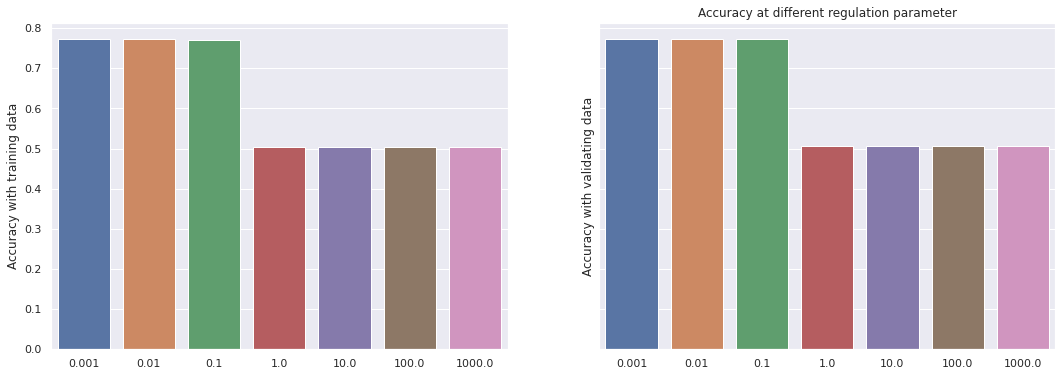

In [98]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
plt.title("Accuracy at different regulation parameter")

x1 = np.array([0.001,0.01,0.1,1,10,100,1000])
y1 = np.array([trainAccWLambda0001L1, trainAccWLambda001L1, trainAccWLambda01L1, trainAccWLambda1L1, trainAccWLambda10L1, trainAccWLambda100L1, trainAccWLambda1000L1])
sns.barplot(x=x1, y=y1, ax=ax1)
ax1.set_ylabel("Accuracy with training data")

x2 = np.array([0.001,0.01,0.1,1,10,100,1000])
y2 = np.array([valAccWLambda0001L1, valAccWLambda001L1, valAccWLambda01L1, valAccWLambda1L1, valAccWLambda10L1, valAccWLambda100L1, valAccWLambda1000L1])
sns.barplot(x=x2, y=y2, ax=ax2)
ax2.set_ylabel("Accuracy with validating data")
plt.show()

Most important weight:

In [99]:
FinalWStarL1 = dict(zip(featureData.columns.values, wLambda01L1))
dict(sorted(FinalWStarL1.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'Vehicle_Damage': 0.7097506926131899,
 'dummy': -0.5234762191210949,
 'Gender': 0.0,
 'Age': 0.0,
 'Driving_License': 0.0,
 'Previously_Insured': 0.0,
 'Annual_Premium': 0.0,
 'Vintage': 0.0,
 'Region_Code_0': 0.0,
 'Region_Code_1': 0.0,
 'Region_Code_2': 0.0,
 'Region_Code_3': 0.0,
 'Region_Code_4': 0.0,
 'Region_Code_5': 0.0,
 'Region_Code_6': 0.0,
 'Region_Code_7': 0.0,
 'Region_Code_8': 0.0,
 'Region_Code_9': 0.0,
 'Region_Code_10': 0.0,
 'Region_Code_11': 0.0,
 'Region_Code_12': 0.0,
 'Region_Code_13': 0.0,
 'Region_Code_14': 0.0,
 'Region_Code_15': 0.0,
 'Region_Code_16': 0.0,
 'Region_Code_17': 0.0,
 'Region_Code_18': 0.0,
 'Region_Code_19': 0.0,
 'Region_Code_20': 0.0,
 'Region_Code_21': 0.0,
 'Region_Code_22': 0.0,
 'Region_Code_23': 0.0,
 'Region_Code_24': 0.0,
 'Region_Code_25': 0.0,
 'Region_Code_26': 0.0,
 'Region_Code_27': 0.0,
 'Region_Code_28': 0.0,
 'Region_Code_29': 0.0,
 'Region_Code_30': 0.0,
 'Region_Code_31': 0.0,
 'Region_Code_32': 0.0,
 'Region_Code_33': 0.0,
 

In [100]:
FinalWDashL1 = dict(zip(featureData.columns.values, wLambda001L1))
dict(sorted(FinalWDashL1.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'Previously_Insured': -0.6751736901191268,
 'Vehicle_Damage': 0.5996496718212994,
 'Policy_Sales_Channel_152': -0.28295702656804006,
 'Vehicle_Age_1': -0.27806244412937786,
 'dummy': -0.13044404108686689,
 'Vehicle_Age_0': 0.06484718521670925,
 'Region_Code_28': 0.06259437940057135,
 'Policy_Sales_Channel_26': 0.0597525098891578,
 'Age': 0.057197205346484946,
 'Policy_Sales_Channel_124': 0.055109998588124876,
 'Driving_License': -0.043370025343656304,
 'Annual_Premium': 0.028156252254624755,
 'Policy_Sales_Channel_160': -0.0140405212394939,
 'Vintage': -0.0017905836303603686,
 'Gender': 0.0,
 'Region_Code_0': 0.0,
 'Region_Code_1': 0.0,
 'Region_Code_2': 0.0,
 'Region_Code_3': 0.0,
 'Region_Code_4': 0.0,
 'Region_Code_5': 0.0,
 'Region_Code_6': 0.0,
 'Region_Code_7': 0.0,
 'Region_Code_8': 0.0,
 'Region_Code_9': 0.0,
 'Region_Code_10': 0.0,
 'Region_Code_11': 0.0,
 'Region_Code_12': 0.0,
 'Region_Code_13': 0.0,
 'Region_Code_14': 0.0,
 'Region_Code_15': 0.0,
 'Region_Code_16': 0.0,
 '

In [101]:
FinalWPlus1 = dict(zip(featureData.columns.values, wLambda1L1))
dict(sorted(FinalWPlus1.items(), key=lambda item: np.absolute(item[1]), reverse = True))

{'dummy': -0.018667208719691318,
 'Gender': 0.0,
 'Age': 0.0,
 'Driving_License': 0.0,
 'Previously_Insured': 0.0,
 'Vehicle_Damage': 0.0,
 'Annual_Premium': 0.0,
 'Vintage': 0.0,
 'Region_Code_0': 0.0,
 'Region_Code_1': 0.0,
 'Region_Code_2': 0.0,
 'Region_Code_3': 0.0,
 'Region_Code_4': 0.0,
 'Region_Code_5': 0.0,
 'Region_Code_6': 0.0,
 'Region_Code_7': 0.0,
 'Region_Code_8': 0.0,
 'Region_Code_9': 0.0,
 'Region_Code_10': 0.0,
 'Region_Code_11': 0.0,
 'Region_Code_12': 0.0,
 'Region_Code_13': 0.0,
 'Region_Code_14': 0.0,
 'Region_Code_15': 0.0,
 'Region_Code_16': 0.0,
 'Region_Code_17': 0.0,
 'Region_Code_18': 0.0,
 'Region_Code_19': 0.0,
 'Region_Code_20': 0.0,
 'Region_Code_21': 0.0,
 'Region_Code_22': 0.0,
 'Region_Code_23': 0.0,
 'Region_Code_24': 0.0,
 'Region_Code_25': 0.0,
 'Region_Code_26': 0.0,
 'Region_Code_27': 0.0,
 'Region_Code_28': 0.0,
 'Region_Code_29': 0.0,
 'Region_Code_30': 0.0,
 'Region_Code_31': 0.0,
 'Region_Code_32': 0.0,
 'Region_Code_33': 0.0,
 'Region_Code_

Sparcity graph:

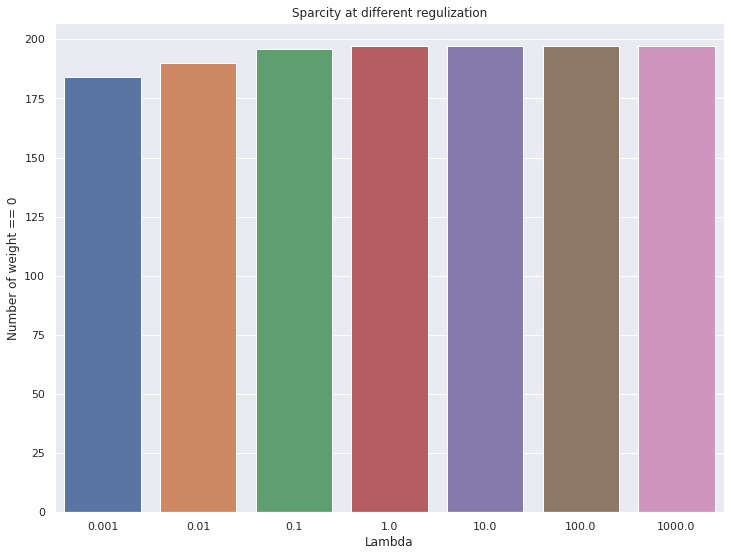

In [102]:
plt.subplots(figsize=(12, 9))
plt.title("Sparcity at different regulization")
xaxis = np.array([0.001,0.01,0.1,1,10,100,1000])
sparcities = np.array([
    featuresNumber - np.count_nonzero(roundingW(wLambda0001L1)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda001L1)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda01L1)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda1L1)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda10L1)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda100L1)), 
    featuresNumber - np.count_nonzero(roundingW(wLambda1000L1))
])
ax = sns.barplot(x = xaxis, y = sparcities)
ax.set(xlabel='Lambda', ylabel='Number of weight == 0')
plt.show()